In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from collections import Counter
from functools import reduce
import ast

#For interactive plots 
import plotly.graph_objects as go #pip install plotly
import dash
from dash import dcc, html #pip install dash
from dash.dependencies import Input, Output #pip install dash-bootstrap-components

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

from src.data.utils import get_franchise_movies, get_franchise_data, get_inflation_rate

In [20]:
movies_df = pd.read_csv('data/movie_metadata_with_tmdb.csv')


inflation_rate_df=get_inflation_rate()
franchise_df=get_franchise_movies(movies_df,inflation_rate_df)



franchise_data_df = get_franchise_data(franchise_df)


# average years between movies of a franchise
#franchise_data_df['average_years_bt_movies'] = franchise_data_df['franchise_length_years'] / (franchise_data_df['movie_count']-1)



In [12]:
def count_genre_diff(curr, prev):
    if curr is None or prev is None:  # Handle NaN or None
        return 0
    curr_set, prev_set = set(curr), set(prev)
    return len(curr_set.symmetric_difference(prev_set))  # Count differences

# Apply the function while ensuring sorting
franchise_df['genre_diff'] = (
    franchise_df.groupby('collection_id', group_keys=False)
    .apply(
        lambda group: group.sort_values(by='movie_order')  # Sort locally
        .assign(
            genre_diff=lambda x: [
                count_genre_diff(curr, prev)
                for curr, prev in zip(x['genres'], x['genres'].shift(1))
            ]
        )
    )['genre_diff']  # Extract the 'genre_diff' column
    .reset_index(drop=True)  # Reset index to avoid misalignment
)

# difference relative de genre
franchise_df['genre_diff_rel'] = franchise_df['genre_diff'] / franchise_df['genres'].apply(len)

/var/folders/8q/3pfpy7tj5xqdr2spkvvmtngr0000gn/T/ipykernel_75482/3451685136.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


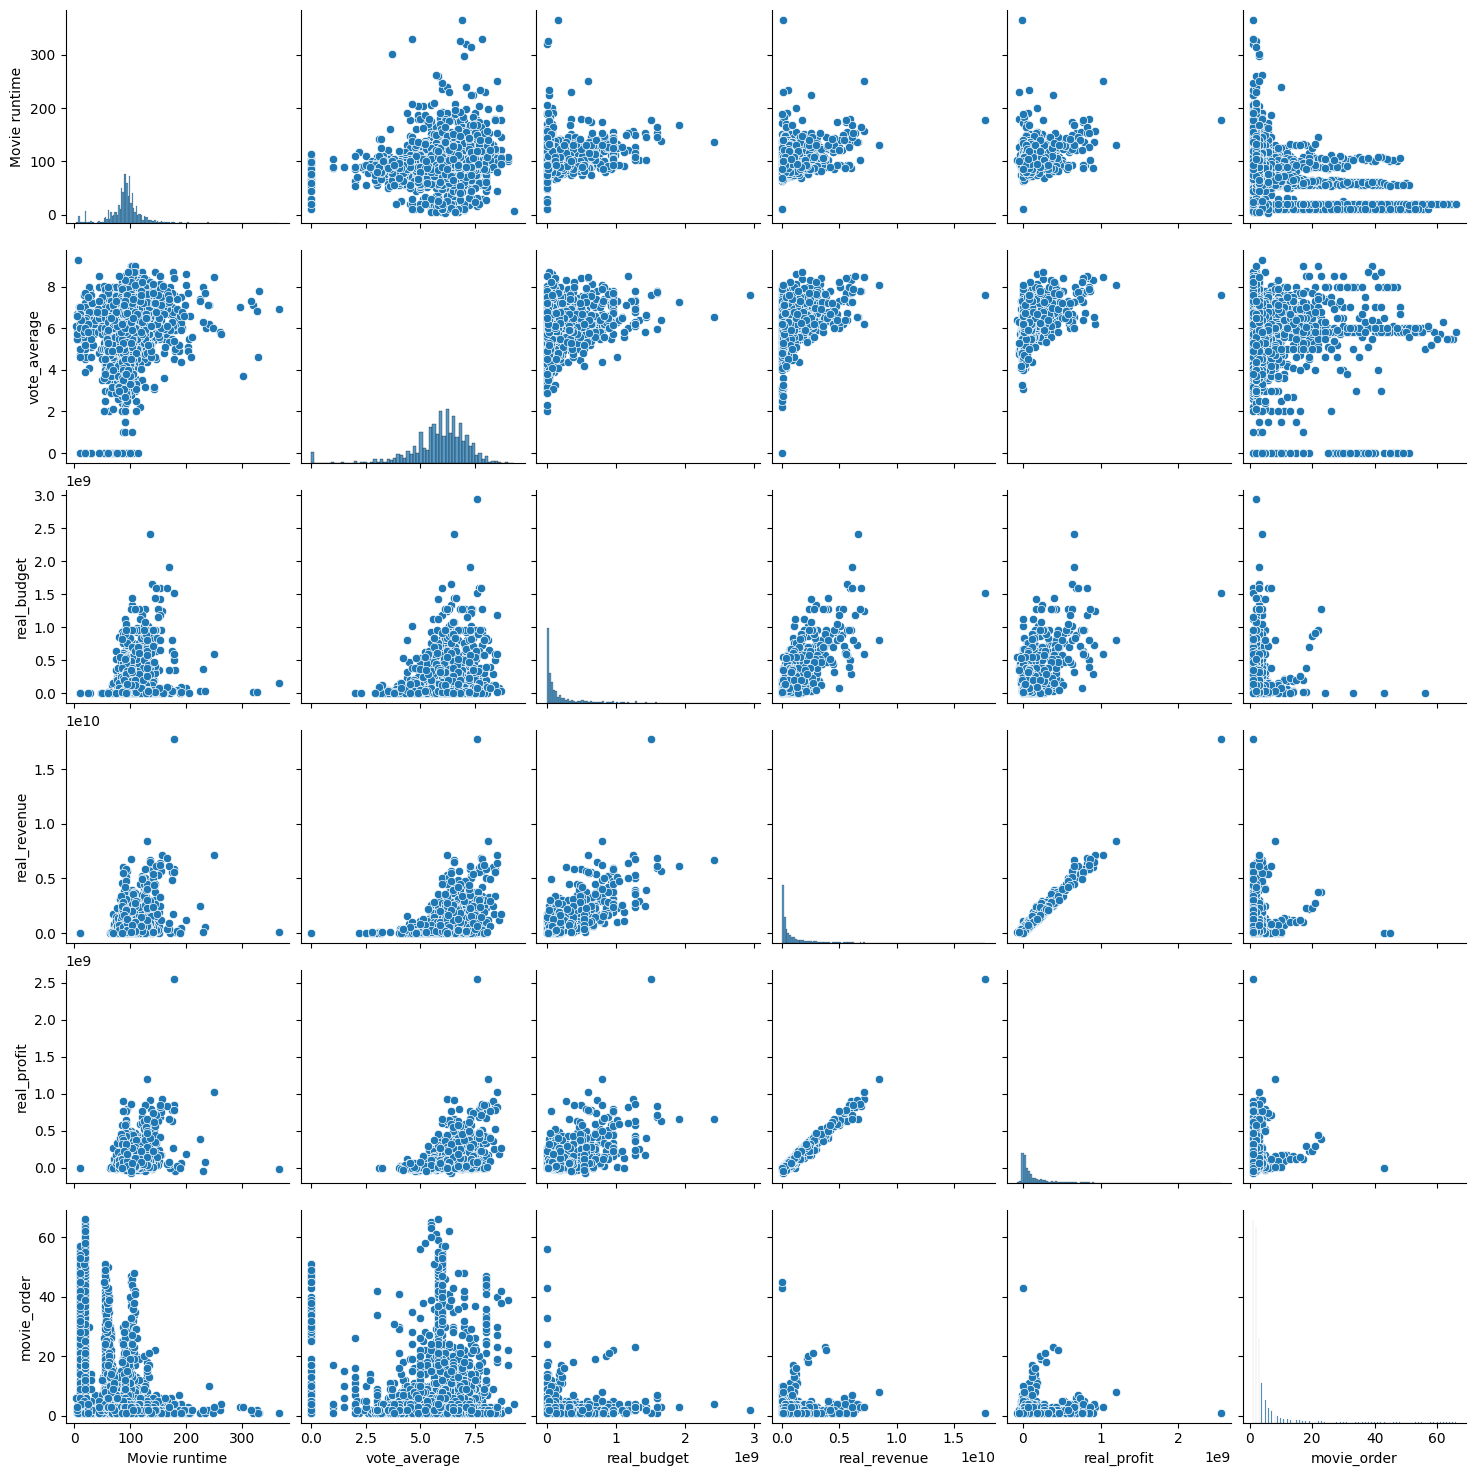

In [6]:
sns.pairplot(franchise_df[['Movie runtime','vote_average','real_budget','real_revenue','real_profit','movie_order']])

Text(0.5, 1.0, 'Pearson Correlation: 0.38\nSpearman Correlation: 0.40')

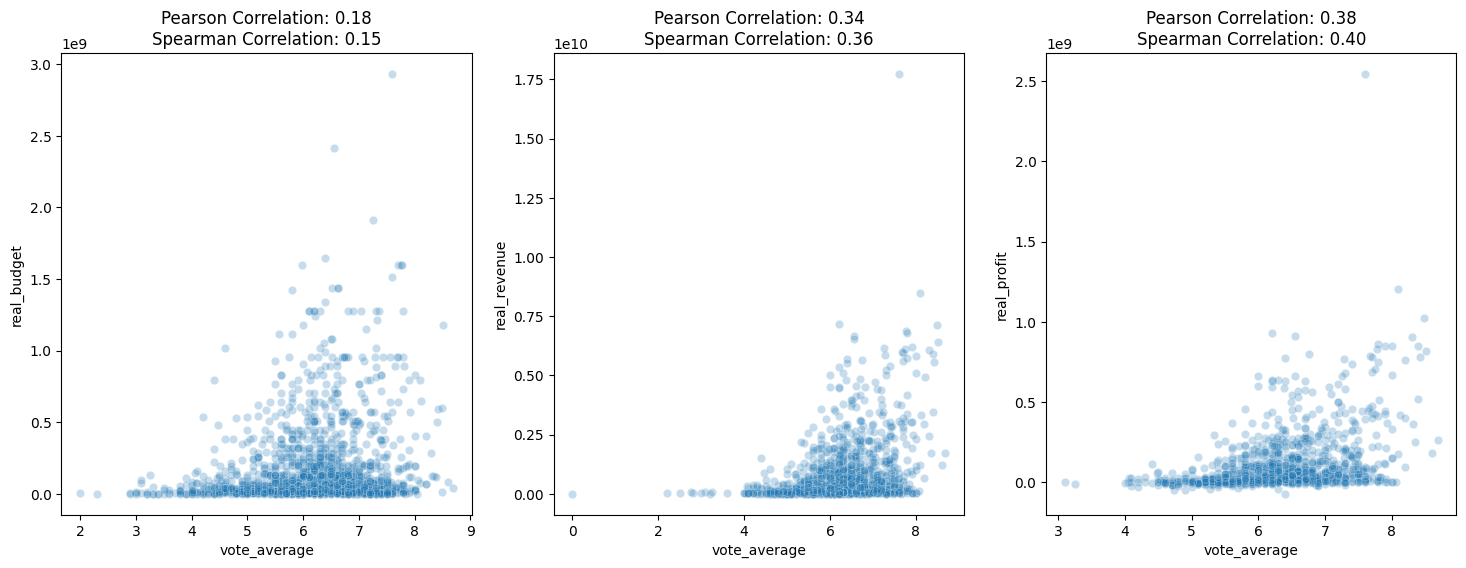

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
 
# scatter plot of the real budget and vote average
sns.scatterplot(x='vote_average', y='real_budget', data=franchise_df,alpha=.25, ax=axes[0])

# scatter plot of the real revenue and vote average
sns.scatterplot(x='vote_average', y='real_revenue', data=franchise_df,alpha=.25, ax=axes[1])

# scatter plot of the real profit and vote average
sns.scatterplot(x='vote_average', y='real_profit', data=franchise_df,alpha=.25, ax=axes[2])

# Calculate the person and spearmann correlation
person_corr = franchise_df[['vote_average','real_budget','real_revenue','real_profit']].corr(method='pearson')
spearman_corr = franchise_df[['vote_average','real_budget','real_revenue','real_profit']].corr(method='spearman')

axes[0].set_title(f'Pearson Correlation: {person_corr.iloc[0,1]:.2f}\nSpearman Correlation: {spearman_corr.iloc[0,1]:.2f}')
axes[1].set_title(f'Pearson Correlation: {person_corr.iloc[0,2]:.2f}\nSpearman Correlation: {spearman_corr.iloc[0,2]:.2f}')
axes[2].set_title(f'Pearson Correlation: {person_corr.iloc[0,3]:.2f}\nSpearman Correlation: {spearman_corr.iloc[0,3]:.2f}')

Text(0.5, 1.0, 'Pearson Correlation: -0.08\nSpearman Correlation: -0.07')

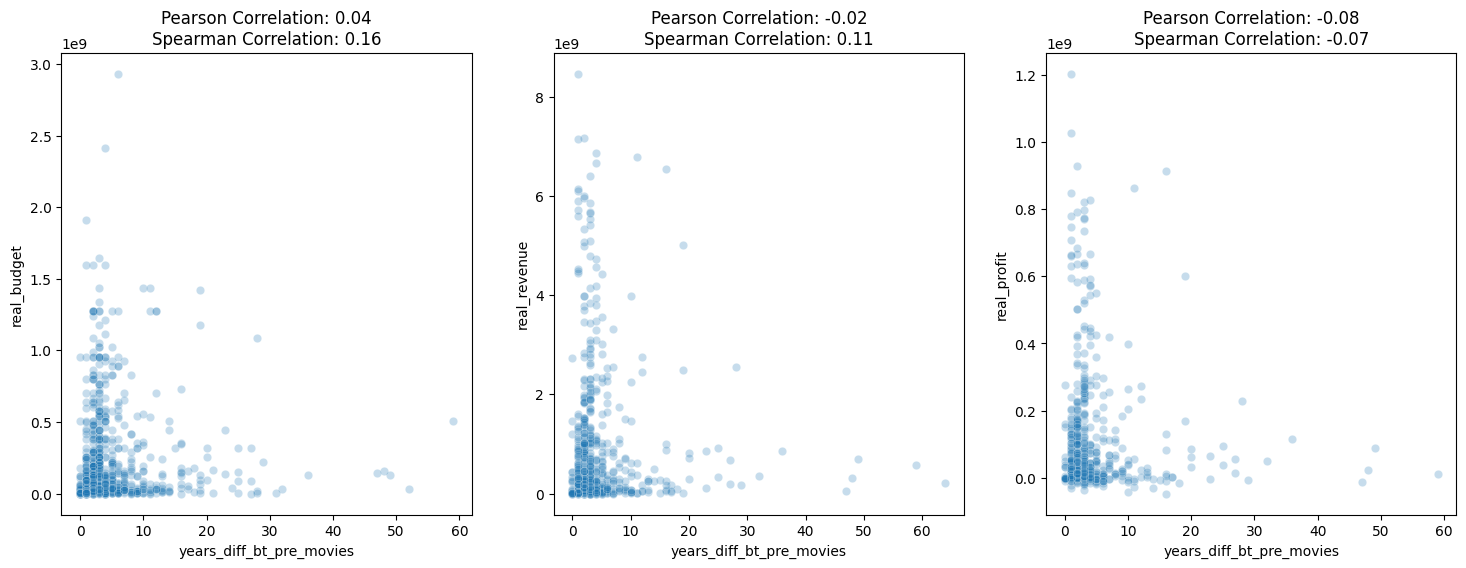

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
 
# scatter plot of the real budget and years diff bt pre movies
sns.scatterplot(x='years_diff_bt_pre_movies', y='real_budget', data=franchise_df,alpha=.25, ax=axes[0])

# scatter plot of the real revenue and years diff bt pre movies
sns.scatterplot(x='years_diff_bt_pre_movies', y='real_revenue', data=franchise_df,alpha=.25, ax=axes[1])

# scatter plot of the real profit and years diff bt pre movies
sns.scatterplot(x='years_diff_bt_pre_movies', y='real_profit', data=franchise_df,alpha=.25, ax=axes[2])

# Calculate the person and spearmann correlation
person_corr = franchise_df[['years_diff_bt_pre_movies','real_budget','real_revenue','real_profit']].corr(method='pearson')
spearman_corr = franchise_df[['years_diff_bt_pre_movies','real_budget','real_revenue','real_profit']].corr(method='spearman')

axes[0].set_title(f'Pearson Correlation: {person_corr.iloc[0,1]:.2f}\nSpearman Correlation: {spearman_corr.iloc[0,1]:.2f}')
axes[1].set_title(f'Pearson Correlation: {person_corr.iloc[0,2]:.2f}\nSpearman Correlation: {spearman_corr.iloc[0,2]:.2f}')
axes[2].set_title(f'Pearson Correlation: {person_corr.iloc[0,3]:.2f}\nSpearman Correlation: {spearman_corr.iloc[0,3]:.2f}')

Text(0.5, 1.0, 'Pearson Correlation: 0.08\nSpearman Correlation: 0.01')

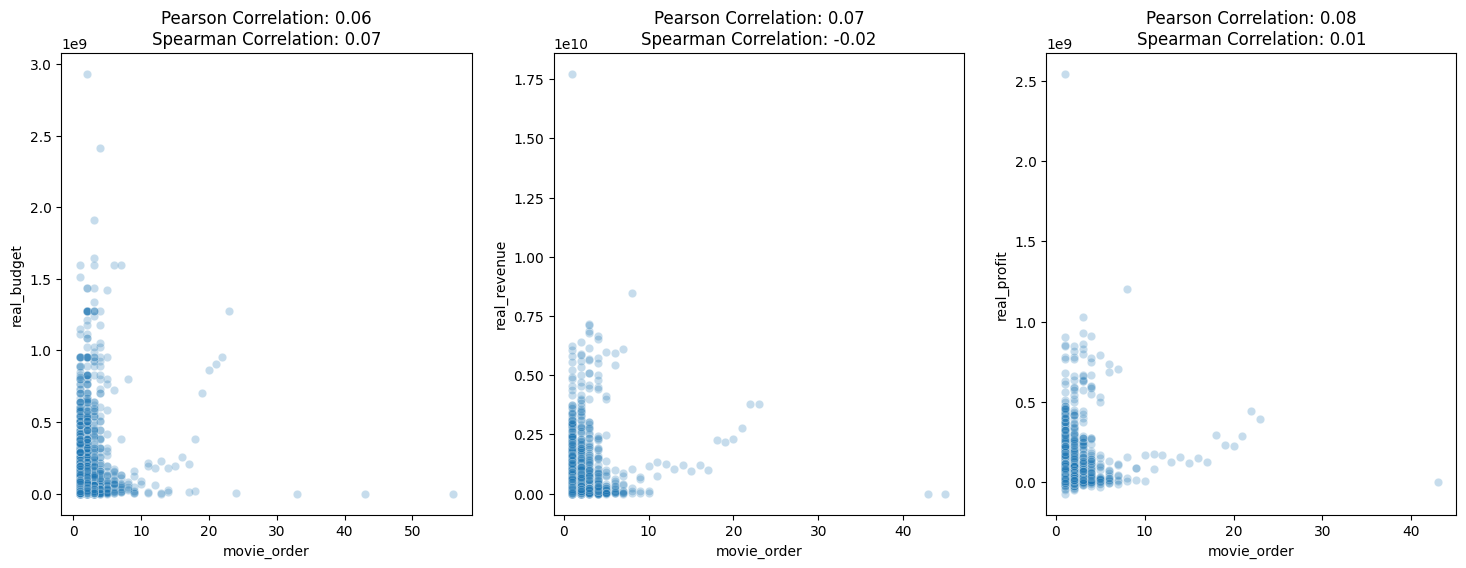

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
 
# scatter plot of the real budget and movie order
sns.scatterplot(x='movie_order', y='real_budget', data=franchise_df,alpha=.25, ax=axes[0])

# scatter plot of the real revenue and movie order
sns.scatterplot(x='movie_order', y='real_revenue', data=franchise_df,alpha=.25, ax=axes[1])

# scatter plot of the real profit and movie order
sns.scatterplot(x='movie_order', y='real_profit', data=franchise_df,alpha=.25, ax=axes[2])

# Calculate the person and spearmann correlation
person_corr = franchise_df[['movie_order','real_budget','real_revenue','real_profit']].corr(method='pearson')
spearman_corr = franchise_df[['movie_order','real_budget','real_revenue','real_profit']].corr(method='spearman')

axes[0].set_title(f'Pearson Correlation: {person_corr.iloc[0,1]:.2f}\nSpearman Correlation: {spearman_corr.iloc[0,1]:.2f}')
axes[1].set_title(f'Pearson Correlation: {person_corr.iloc[0,2]:.2f}\nSpearman Correlation: {spearman_corr.iloc[0,2]:.2f}')
axes[2].set_title(f'Pearson Correlation: {person_corr.iloc[0,3]:.2f}\nSpearman Correlation: {spearman_corr.iloc[0,3]:.2f}')

In [ ]:
# analysis of the difference between the first en second movies
fsm_df = franchise_df[(franchise_df['movie_order'] == 1) | (franchise_df['movie_order'] == 2)]
fsm_df = fsm_df[['Movie name','collection_name','movie_order','real_budget','real_revenue','real_profit','years_diff_bt_pre_movies','genre_diff','genre_diff_rel']]
fsm_df.sort_values(by='movie_order',inplace=True)
fsm_df['diff_profit_1_2'] = fsm_df.groupby('collection_name')['real_profit'].diff()
fsm_df['diff_budget_1_2'] = fsm_df.groupby('collection_name')['real_budget'].diff()
fsm_df['diff_revenue_1_2'] = fsm_df.groupby('collection_name')['real_revenue'].diff()
sm_df = fsm_df[fsm_df['movie_order'] == 2]
sm_df['profit_over_budget'] = sm_df['real_profit'] / sm_df['real_budget']
sm_df=sm_df[sm_df['diff_profit_1_2'].notna()]   



/var/folders/8q/3pfpy7tj5xqdr2spkvvmtngr0000gn/T/ipykernel_64529/3346083113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_df['profit_over_budget'] = sm_df['real_profit'] / sm_df['real_budget']


In [21]:
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

# Define the features and the label
X = sm_df[['real_budget','years_diff_bt_pre_movies','diff_profit_1_2','diff_budget_1_2','genre_diff']]
X = pd.get_dummies(X, columns=['genre_diff'], drop_first=True)

y = sm_df['profit_over_budget']

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Add a constant to the features (intercept term)
X_std = sm.add_constant(X_std)

# Fit the regression model
model = sm.OLS(y, X_std).fit()

# Print the summary of the regression model
print(model.summary())

results_table = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.params[1:],
    'P-value': model.pvalues[1:]
})
print(results_table)

                            OLS Regression Results                            
Dep. Variable:     profit_over_budget   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.751
Date:                Mon, 09 Dec 2024   Prob (F-statistic):             0.0785
Time:                        14:24:20   Log-Likelihood:                -413.41
No. Observations:                 251   AIC:                             846.8
Df Residuals:                     241   BIC:                             882.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5874      0.081      7.259      0.0

In [ ]:
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm


# Define the features and the label
X = sm_df[['real_budget','years_diff_bt_pre_movies','diff_profit_1_2','diff_budget_1_2','genre_diff_rel']]

y = sm_df['profit_over_budget']

# Standardize the features£
X_std = StandardScaler().fit_transform(X)

# Add a constant to the features (intercept term)
X_std = sm.add_constant(X_std)

# Fit the regression model
model = sm.OLS(y, X_std).fit()

# Print the summary of the regression model
print(model.summary())

results_table = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.params[1:],
    'P-value': model.pvalues[1:]
})
print(results_table) #-> ptetre le changement de genre on pourrait lanalyse comme un traitement et ducou calculer le pourcentage daugmention moyenn de profit lorsuqe que il y a un changement de genre

                            OLS Regression Results                            
Dep. Variable:     profit_over_budget   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.848
Date:                Mon, 09 Dec 2024   Prob (F-statistic):             0.0161
Time:                        14:22:39   Log-Likelihood:                -414.27
No. Observations:                 251   AIC:                             840.5
Df Residuals:                     245   BIC:                             861.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5874      0.081      7.294      0.0

collection_id                 0
collection_name               0
genres                        0
oldest_release                7
newest_release                7
movie_count                   0
average_years_bt_movies       7
franchise_length              7
franchise_length_years        7
revenue                    1340
revenue_avg                1340
country                       0
region                        0
average_score                 0
dtype: int64

/opt/anaconda3/envs/ada/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/envs/ada/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/envs/ada/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


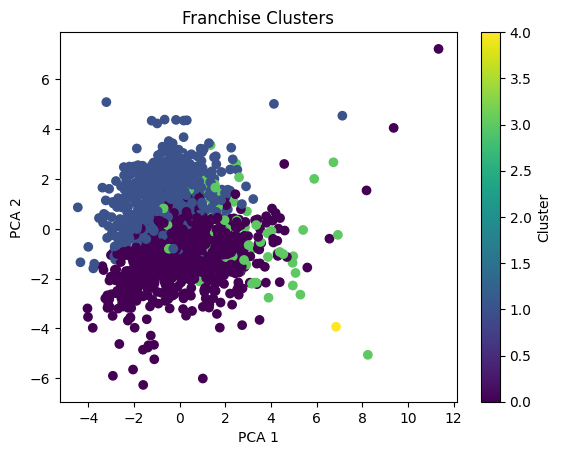

,collection_name,Cluster
3,Three Colors Collection,0
7,Back to the Future Collection,0
12,The Chronicles of Narnia Collection,0
17,Wallace & Gromit Collection,0
23,The Pink Panther (Original) Collection,0
0,Star Wars Collection,1
1,Indiana Jones Collection,1
2,The Lord of the Rings Collection,1
4,Star Trek: The Original Series Collection,1
5,The Godfather Collection,1


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd



franchise_data_df = get_franchise_data(franchise_df)

# genre vecotrization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(", "))
genre_matrix = vectorizer.fit_transform(franchise_data_df['genres'])
genre_df = pd.DataFrame(genre_matrix.toarray(), columns=[f'genre_{col}' for col in vectorizer.get_feature_names_out()])
franchise_data_df = pd.concat([franchise_data_df, genre_df], axis=1)

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(", "))
country_matrix = vectorizer.fit_transform(franchise_data_df['country'])
country_df = pd.DataFrame(country_matrix.toarray(), columns=[f'country_{col}' for col in vectorizer.get_feature_names_out()])
franchise_data_df = pd.concat([franchise_data_df, country_df], axis=1)

franchise_data_df['oldest_release_year'] = franchise_data_df['oldest_release'].dt.year
franchise_data_df['newest_release_year'] = franchise_data_df['newest_release'].dt.year

# Fill NaN in the 'revenue_avg' column with 0
franchise_data_df['revenue_avg'] = franchise_data_df['revenue_avg'].fillna(0)



# Load and preprocess dat
data = franchise_data_df.drop(columns=['collection_id','collection_name','genres','oldest_release','newest_release','franchise_length','revenue','country','region'])

# Drop rows where any other column contains NaN
data = data.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Assign clusters back to franchise_data_df
franchise_data_df['Cluster'] = pd.NA  # Initialize Cluster column with NaN
franchise_data_df.loc[data.index, 'Cluster'] = clusters

    
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Franchise Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# print the 5 first franchises of each cluster
franchise_data_df.groupby('Cluster')[['collection_name','Cluster']].head(5).sort_values(by='Cluster')



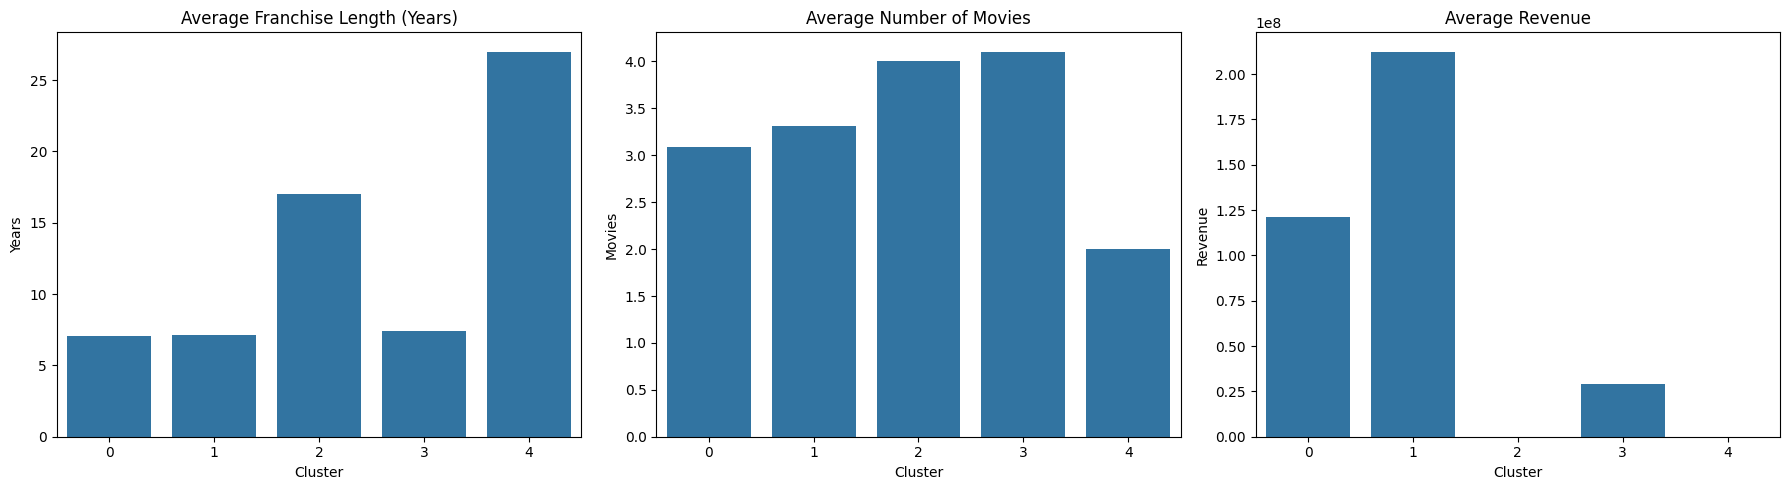


Top 3 Genres by Cluster:
         genre_action  genre_adventure  genre_animation  genre_comedy  \
Cluster                                                                 
0                 152              245              115           549   
1                 397              170               34           117   
2                   2                2                0             0   
3                  47               36                2            22   
4                   0                0                0             0   

         genre_crime  genre_documentary  genre_drama  genre_family  \
Cluster                                                              
0                 85                 31          283           272   
1                242                  1          221            16   
2                  0                  0            1             0   
3                 11                  2           67             3   
4                  0                  0   

In [67]:
franchise_data_df = franchise_data_df.dropna(subset=['Cluster'])

# Ensure clusters are integers
franchise_data_df['Cluster'] = franchise_data_df['Cluster'].astype(int)

# Step 1: Calculate Averages
average_stats = franchise_data_df.groupby('Cluster').agg(
    length_in_years=('franchise_length_years', 'mean'),
    number_of_movies=('movie_count', 'mean'),
    revenue_avg=('revenue_avg', 'mean')
)


# Step 2: Extract Top 3 Countries and Genres for Each Cluster
sum_country_cluster = (
    franchise_data_df.groupby('Cluster')[[col for col in franchise_data_df.columns if col.startswith('country_')]].sum()
)

# cluster=sum_country_cluster['Cluster']
# sum_country_cluster=sum_country_cluster.drop(columns=['Cluster'])
# sum_country_cluster.apply(
#     lambda row: row.sort_values(ascending=False).iloc[:5],
#     axis=1)

genre_summary = (
    franchise_data_df.groupby('Cluster')[[col for col in franchise_data_df.columns if col.startswith('genre_')]].sum()
    .apply(lambda x: x.sort_values(), axis=1)
)

# Step 3: Plot Averages for Numerical Features
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=average_stats.index, y=average_stats['length_in_years'], ax=axs[0])
axs[0].set_title('Average Franchise Length (Years)')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Years')

sns.barplot(x=average_stats.index, y=average_stats['number_of_movies'], ax=axs[1])
axs[1].set_title('Average Number of Movies')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Movies')

sns.barplot(x=average_stats.index, y=average_stats['revenue_avg'], ax=axs[2])
axs[2].set_title('Average Revenue')
axs[2].set_xlabel('Cluster')
axs[2].set_ylabel('Revenue')

plt.tight_layout()
plt.show()

# Step 4: Print Top Countries and Genres for Each Cluster
# print("Top 3 Countries by Cluster:")
# print(sum_country_cluster.index.tolist())

print("\nTop 3 Genres by Cluster:")
print(genre_summary)
